<a href="https://colab.research.google.com/github/B69Yash/Yash-Yadav_Python_Machine_Learning/blob/main/QL(PR1)Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [5]:
from google.colab import files


uploaded = files.upload()

Saving Diamond Price Prediction.csv to Diamond Price Prediction.csv


In [6]:
data=pd.read_csv("Diamond Price Prediction.csv")

In [7]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [8]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
data=data.drop(['depth','table','x','y','z'],axis=1)

In [12]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326
1,2,0.21,Premium,E,SI1,326


In [13]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
price           int64
dtype: object

In [14]:
data['price']=data.price.astype(float)
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
price         float64
dtype: object

Text(0.5, 1.0, 'Distribution Price Distribution')

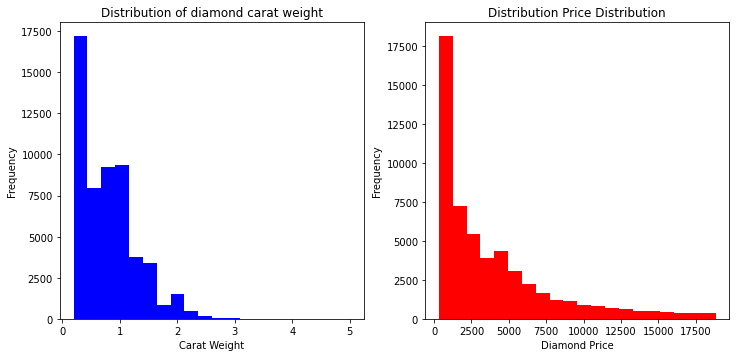

In [15]:
plt.figure(figsize=[12,12])
plt.subplot(221)
#carat weight distribution
plt.hist(data['carat'],bins=20,color='b')
plt.xlabel("Carat Weight")
plt.ylabel("Frequency")
plt.title("Distribution of diamond carat weight")
plt.subplot(222)
#distribution of price value
plt.hist(data['price'],bins=20,color='r')
plt.xlabel("Diamond Price")
plt.ylabel("Frequency")
plt.title("Distribution Price Distribution")

In [16]:
data.head(1)

,Unnamed: 0,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326.0


In [17]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
label=l1.fit_transform(data['cut'])
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [18]:
label

array([2, 3, 1, ..., 4, 3, 2])

In [20]:
data['cut_label']=label

In [21]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label
0,1,0.23,Ideal,E,SI2,326.0,2
1,2,0.21,Premium,E,SI1,326.0,3


In [22]:
l2=LabelEncoder()
label1 = l2.fit_transform(data['clarity'])
data['clarity_label']=label1
data.head(2)


,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,E,SI2,326.0,2,3
1,2,0.21,Premium,E,SI1,326.0,3,2


In [23]:
data['color']=data['color'].map({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7, 'NA':8})#astype(nt)

In [24]:
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

In [25]:
data['color'].isnull().sum()

0

In [26]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,2,SI2,326.0,2,3
1,2,0.21,Premium,2,SI1,326.0,3,2


In [27]:
y=data['price']
y.head(1)

0    326.0
Name: price, dtype: float64

In [28]:
x=data.drop(['price','cut','clarity'],axis=1)
x.head(1)

,Unnamed: 0,carat,color,cut_label,clarity_label
0,1,0.23,2,2,3


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [30]:
len(x_train)

43152

In [31]:
len(y_test)

10788

In [32]:
len(data)

53940

In [33]:
43152+10788

53940

In [34]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,2,SI2,326.0,2,3
1,2,0.21,Premium,2,SI1,326.0,3,2
2,3,0.23,Good,2,VS1,327.0,1,4
3,4,0.29,Premium,6,VS2,334.0,3,5
4,5,0.31,Good,7,SI2,335.0,1,3


Standard Scaler Method

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Linear Regression Algorithm

In [36]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
pred=linreg.predict(x_test)

# Accuracy Score of Linear Regression Model

In [37]:
from sklearn.metrics import r2_score
lr=r2_score(y_test,pred)*100
print(lr)

87.96462213408553


# Decision Tree Regressor algorithm

In [38]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1=reg.predict(x_test)

In [39]:
from sklearn.metrics import r2_score
dtr=r2_score(y_test,pred1)*100
print(dtr)

99.91724634850556


# Random Forest Regressor Algorithm

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)


In [41]:
from sklearn.metrics import r2_score
rf=r2_score(y_test,pred2)*100
print(rf)

99.91900750379142


# K-Neighbors Regressor Algorithm

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)

In [43]:
from sklearn.metrics import r2_score
knn=r2_score(y_test,pred3)*100
print(knn)

99.0101454837934


# Lasso Regressor algorithm 

In [44]:
from sklearn.linear_model import Lasso
lassoreg=Lasso()
lassoreg.fit(x_train,y_train)
pred4=lassoreg.predict(x_test)

In [45]:
lasso=r2_score(y_test,pred4)*100
print(lasso)

87.96428086248696


# Ridge Regression Algorithm

In [46]:
from sklearn.linear_model import Ridge
ridreg=Ridge()
ridreg.fit(x_train,y_train)
pred4=ridreg.predict(x_test)


In [47]:
from sklearn.metrics import r2_score
rid=r2_score(y_test,pred4)*100
print(rid)

87.96461671137354


# SVR Algorithm

In [49]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred5=svr.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
svrscore=r2_score(y_test,pred5)*100
print(svrscore)

49.84694442430495


# Overall Accuracy Score

In [51]:
print("LinearRegression",lr)
print("Decision Tree",dtr)
print("RandomForestClassifire",rf)
print("KNN Regressor",knn)
print("Ridge Linear Model",rid)
print("Lassp Linear Model",lasso)
print("SVR Regressor",svrscore)


LinearRegression 87.96462213408553
Decision Tree 99.91724634850556
RandomForestClassifire 99.91900750379142
KNN Regressor 99.0101454837934
Ridge Linear Model 87.96461671137354
Lassp Linear Model 87.96428086248696
SVR Regressor 49.84694442430495


# Prediction Of Prices

In [52]:
def prediction():
    carat=(input("Enter the Value Of CARAT:"))
    cut=int(input("Enter the Value Of CUT:"))
    clarity=int(input("Enter the Value Of CLARITY:"))
    color=int(input("Enter the Value Of COLOR:"))
    
    
    price=rf.predict([[carat,cut,clarity,color]])
    print("Approximate Price Of Diamond is:",price,'Rs')
    
predi=prediction()
predi

Enter the Value Of CARAT:2
Enter the Value Of CUT:3
Enter the Value Of CLARITY:2
Enter the Value Of COLOR:1


AttributeError: ignored